<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/HAR/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#데이터셋 불러오기
train=pd.read_csv('/content/drive/MyDrive/src/data/train.csv', encoding='utf-8-sig')
test=pd.read_csv('/content/drive/MyDrive/src/data/test.csv', encoding='utf-8-sig')

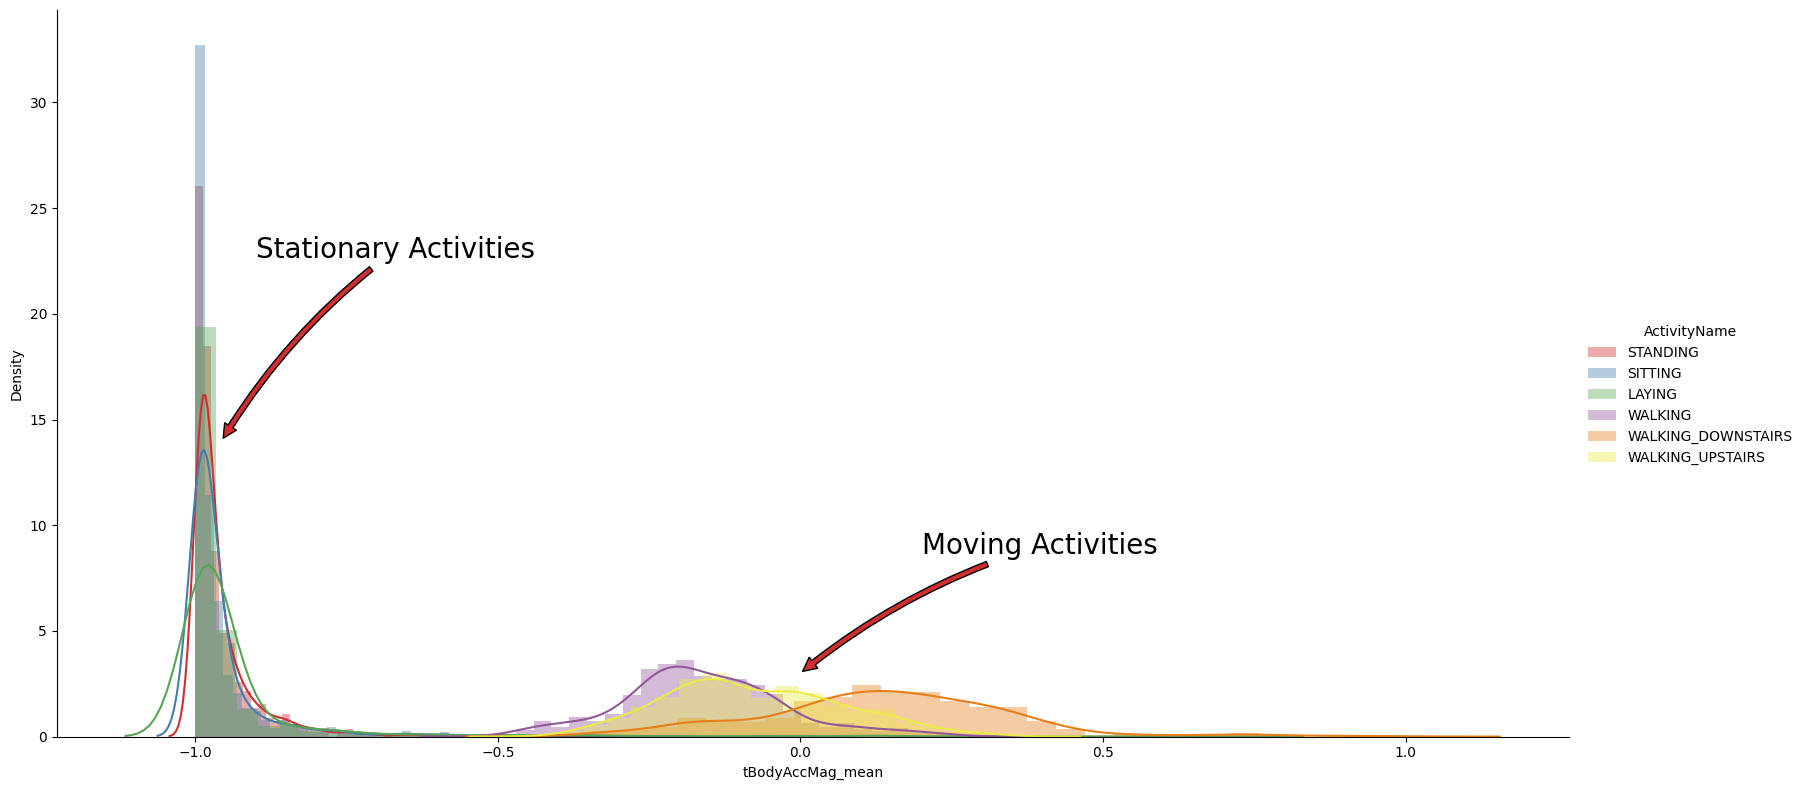

In [3]:
#밀도 분포
sns.set_palette("Set1", desat=0.80)
facetgrid=sns.FacetGrid(train, hue="ActivityName", height=8, aspect=2)
facetgrid.map(sns.distplot, 'tBodyAccMag_mean', hist=True).add_legend()
plt.annotate('Stationary Activities', xy=(-0.956, 14), xytext=(-0.9, 23), size=20,\
             va='center', ha='left',\
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3, rad=0.1"))
plt.annotate('Moving Activities', xy=(0,3), xytext=(0.2, 9), size=20,\
             va='center', ha='left',\
             arrowprops=dict(arrowstyle='simple', connectionstyle='arc3,rad=0.1'))
plt.show()
plt.show()

정적인 행동은 가속도계 평균이 -1에 머물러있다.

반면 이동이 발생하는 동적 활동은 -0.5~0.5 사이의 완만한 분포

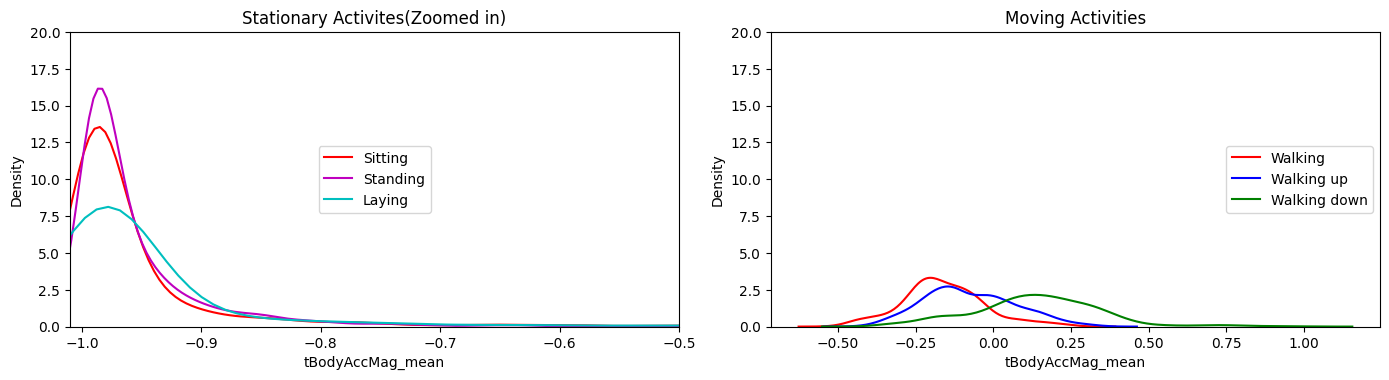

In [4]:
#정적, 동적 행위별 밀도그래프 그리기
df1=train[train['Activity']==1]
df2=train[train['Activity']==2]
df3=train[train['Activity']==3]
df4=train[train['Activity']==4]
df5=train[train['Activity']==5]
df6=train[train['Activity']==6]

#정적인 행위
plt.figure(figsize=(14, 7))
plt.subplot(2,2,1)
plt.title('Stationary Activites(Zoomed in)')
sns.distplot(df4['tBodyAccMag_mean'],color='r', hist=False, label='Sitting')
sns.distplot(df5['tBodyAccMag_mean'], color='m', hist=False, label="Standing")
sns.distplot(df6['tBodyAccMag_mean'], color='c', hist=False, label="Laying")
plt.axis([-1.01, -0.5, 0, 35])
plt.ylim(0, 20)
plt.legend(loc='center')

#동적인 행위
plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMag_mean'], color='red', hist=False, label="Walking")
sns.distplot(df2['tBodyAccMag_mean'], color='blue', hist=False, label="Walking up")
sns.distplot(df3['tBodyAccMag_mean'], color="green", hist=False, label="Walking down")
plt.ylim(0, 20)
plt.legend(loc="center right")

plt.tight_layout()
plt.show()

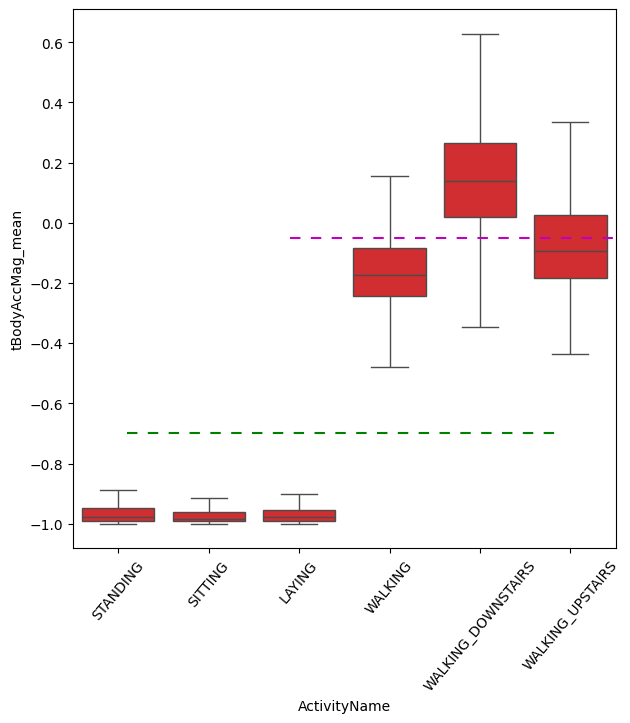

In [5]:
#중력가속도 규모 평균
plt.figure(figsize=(7, 7))
sns.boxplot(x="ActivityName", y="tBodyAccMag_mean", data=train, showfliers=False, saturation=1)
plt.ylabel="Acceleration Magnitude mean"
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5,5),c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=50)
plt.show()

1. 중력가속도 평균이 -0.8보다 작은 경우 정적 행동이다.
2. 중력가속도 평균이 -0.6보다 큰 경우 동적 행동이다.
3. 중력가속도 평균이 0보다 큰 경우 walking_downstairs다.

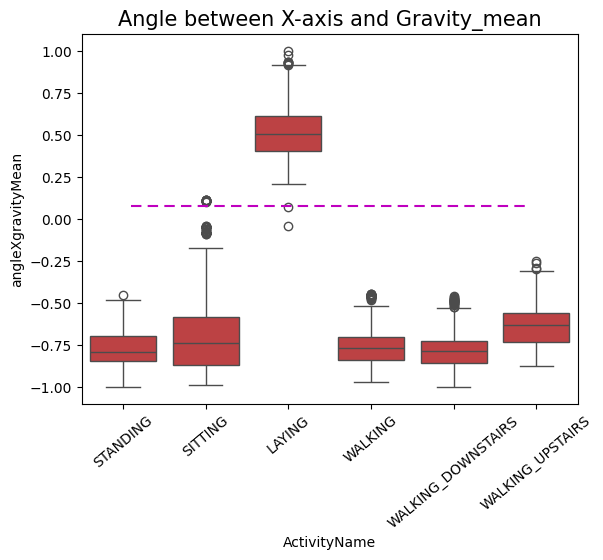

In [6]:
#중력
sns.boxplot(x="ActivityName", y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation=40)
plt.show()

중력가속도 평균이 0 이상인 경우 laying

In [7]:
from sklearn.manifold import TSNE
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
  for index, perplexity in enumerate(perplexities):
    print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
    X_reduced=TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
    print('Done...')

    print('Creating plot for this t-sne visualization..')
    df=pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1], 'label':y_data})

    sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, \
               palette="Set1", markers=['^', 'v', 's', 'o', '1', '2'])
    plt.title("perplexity: {} and max_iter:{}".format(perplexity, n_iter))
    img_name=img_name_prefix+'_prep_{}_iter_{}.png'.format(perplexity, n_iter)
    print("saving this plot as image in present working directory")
    plt.savefig(os.path.join(os.getcwd(), 'drive', 'MyDrive', 'src', 'image', img_name))
    plt.show()
    print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.097s...
[t-SNE] Computed neighbors for 7352 samples in 3.304s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.033s
[t-SNE] Iteration 50: error = 119.3338242, gradient norm = 0.0418882 (50 iterations in 6.127s)
[t-SNE] Iteration 100: error = 105.1657944, gradient norm = 0.0264429 (50 iterations in 

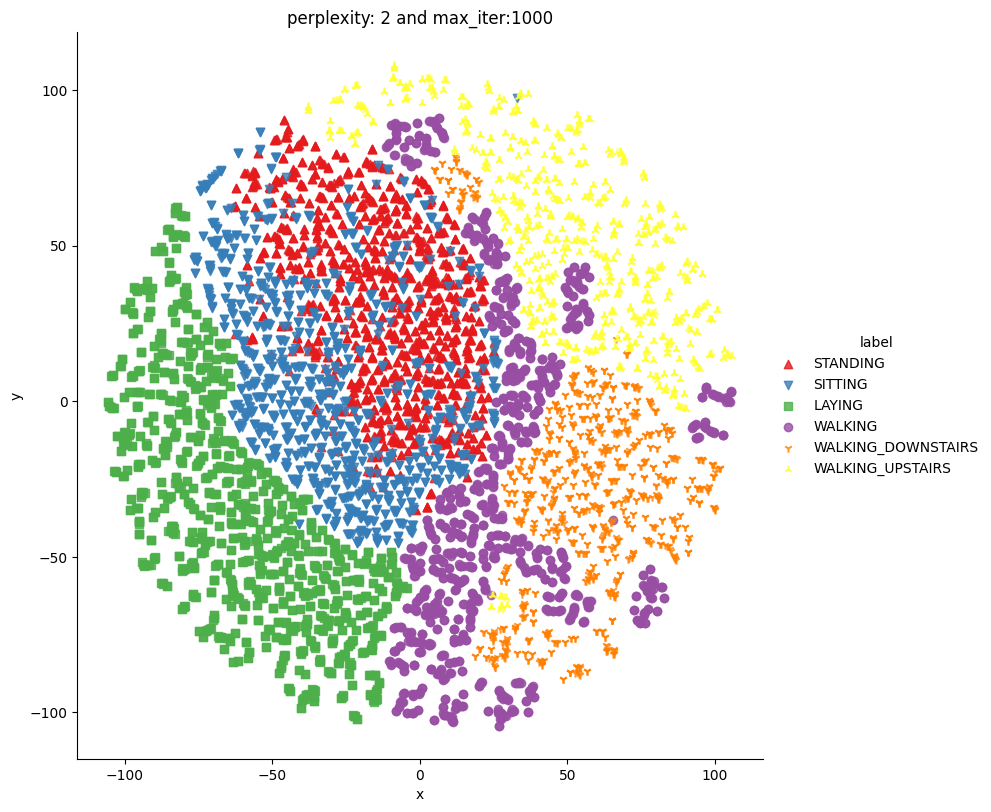

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.022s...
[t-SNE] Computed neighbors for 7352 samples in 2.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.033s
[t-SNE] Iteration 50: error = 107.1729736, gradient norm = 0.0408315 (50 iterations in 7.611s)
[t-SNE] Iteration 100: error = 95.6872787, gradient norm = 0.0140239 (50 iteration

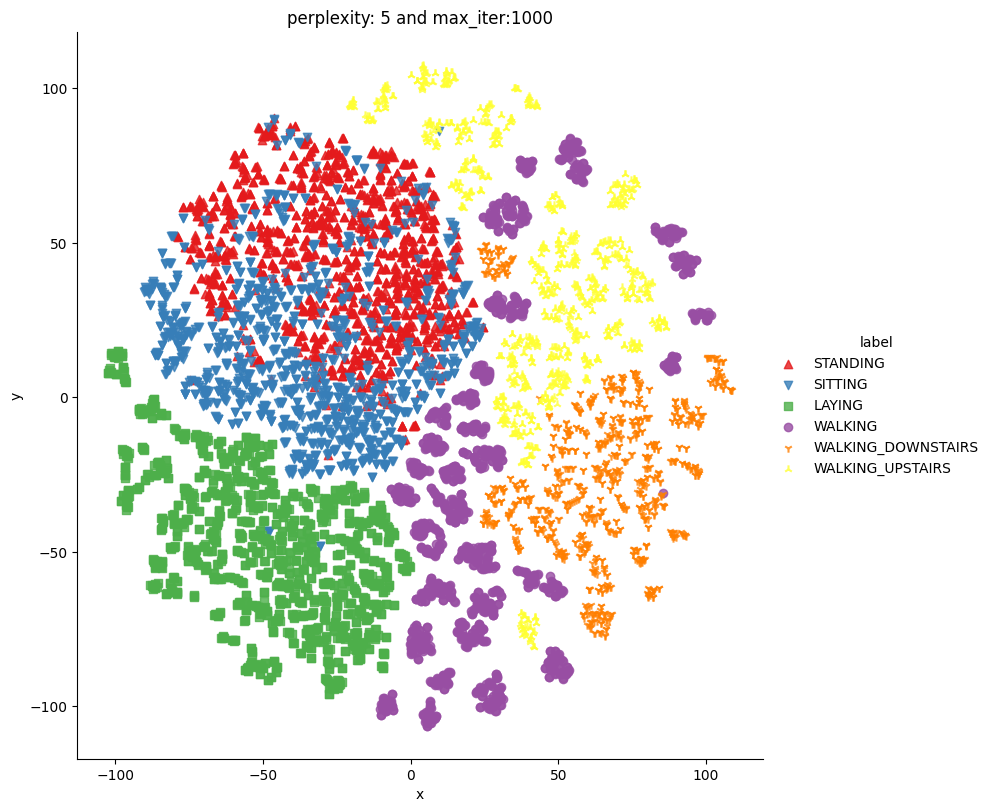

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.029s...
[t-SNE] Computed neighbors for 7352 samples in 2.251s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 97.9056091, gradient norm = 0.0349807 (50 iterations in 6.765s)
[t-SNE] Iteration 100: error = 88.9371872, gradient norm = 0.0104811 (50 iteration

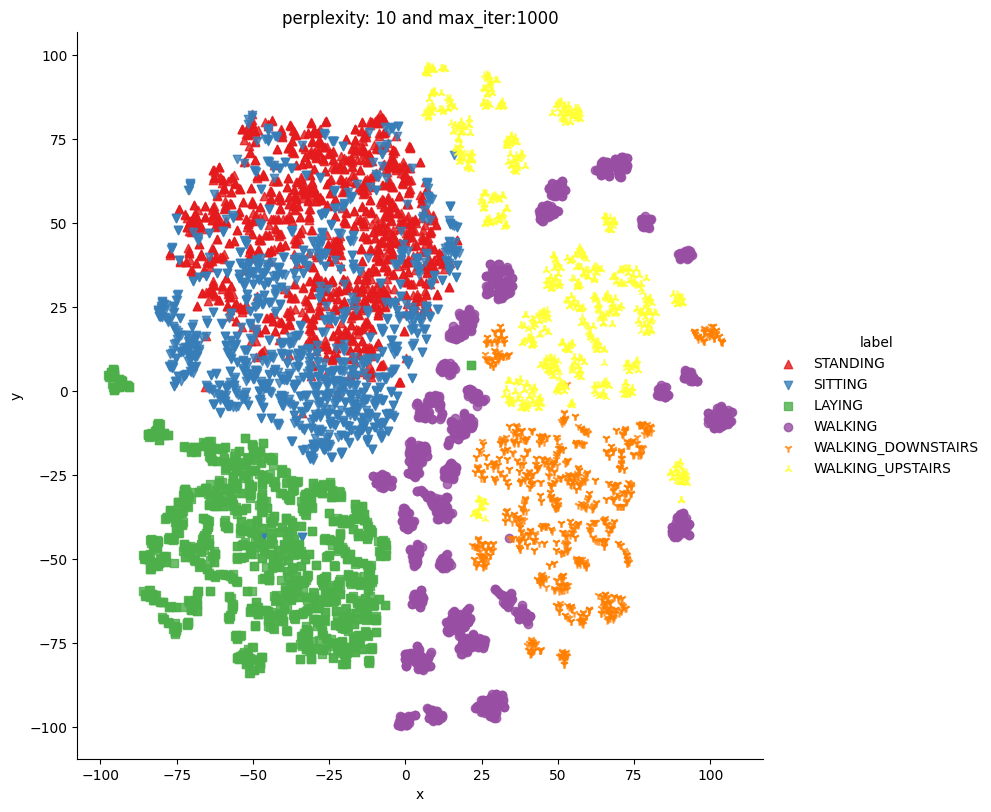

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 2.457s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.127s
[t-SNE] Iteration 50: error = 89.2849884, gradient norm = 0.0298369 (50 iterations in 8.894s)
[t-SNE] Iteration 100: error = 82.9593048, gradient norm = 0.0075895 (50 iteration

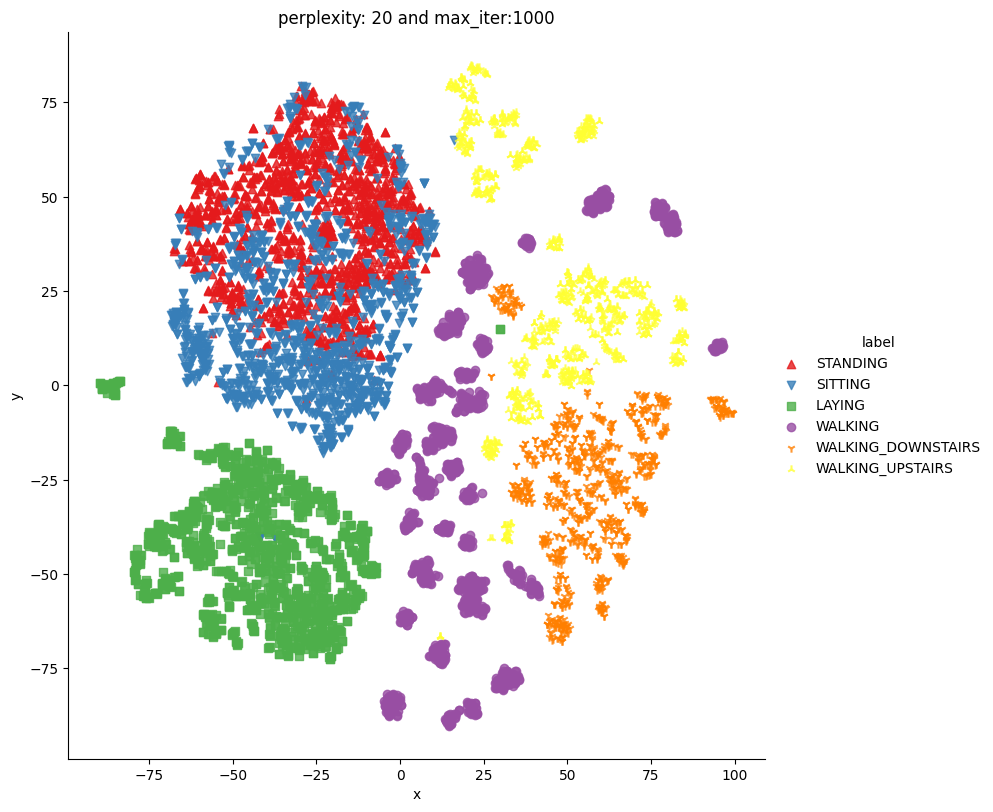

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.018s...
[t-SNE] Computed neighbors for 7352 samples in 3.374s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.552s
[t-SNE] Iteration 50: error = 78.8222504, gradient norm = 0.0250154 (50 iterations in 11.972s)
[t-SNE] Iteration 100: error = 75.2235184, gradient norm = 0.0052430 (50 iterati

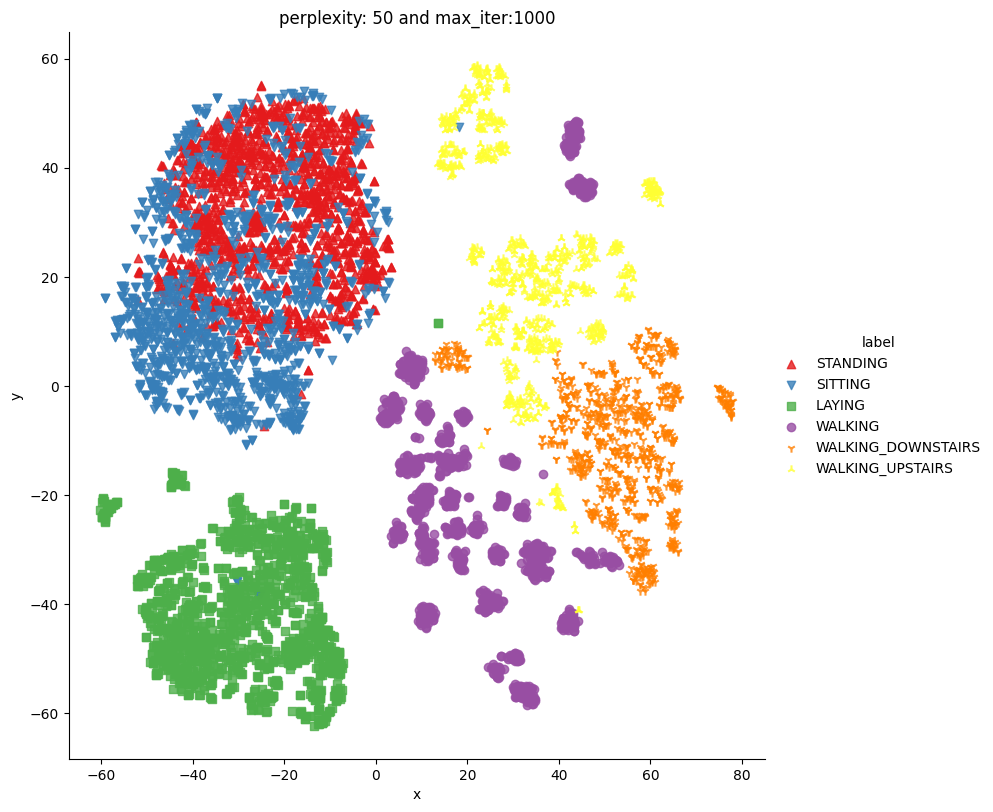

Done


In [8]:
X_pre_tsne=train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_pre_tsne=train['ActivityName']
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2,5,10,20,50])